In [172]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer, LabelEncoder
import pandas as pd

In [173]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
from itertools import chain, combinations

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.preprocessing import KBinsDiscretizer, LabelEncoder, StandardScaler
from sklearn.datasets import make_blobs, load_wine

from data_functions import load_data
from error_probs_model import ErrorProbsModel

from numpy.random import default_rng
rng = default_rng(12345)

In [58]:
data_set_names = pd.read_csv('./data/data_set_ids.csv').name.values

In [59]:
data_set_names

array(['breast-cancer-wisconsin', 'blood-transfusion',
       'pima-indians-diabetes', 'ionosphere', 'sonar', 'biodegradation',
       'vehicle', 'ecoli', 'glass', 'vertebra-column', 'user-knowledge',
       'kc2', 'parkinsons', 'banknote', 'seeds', 'prnn-craps',
       'chscase-vine', 'wine', 'iris', 'segment', 'balance-scale',
       'seismic-bumps', 'steel-plates-fault', 'phoneme', 'satimage',
       'wind'], dtype=object)

In [60]:
for name in data_set_names:
	print(name)
	X, y, _ = load_data(name)
	X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

	model = GaussianNB()
	model.fit(X_train, y_train)

	y_pred = model.predict(X_test).round(3)
	accuracy = np.sum(y_test == y_pred) / len(y_pred)

	print(f'Accuracy: {accuracy}')

breast-cancer-wisconsin
Accuracy: 0.9517543859649122
blood-transfusion
Accuracy: 0.74
pima-indians-diabetes
Accuracy: 0.7597402597402597
ionosphere
Accuracy: 0.9148936170212766
sonar
Accuracy: 0.7976190476190477
biodegradation
Accuracy: 0.7464454976303317
vehicle
Accuracy: 0.415929203539823
ecoli
Accuracy: 0.762962962962963
glass
Accuracy: 0.37209302325581395
vertebra-column
Accuracy: 0.7741935483870968
user-knowledge
Accuracy: 0.8580246913580247
kc2
Accuracy: 0.8277511961722488
parkinsons
Accuracy: 0.7307692307692307
banknote
Accuracy: 0.848816029143898
seeds
Accuracy: 0.9047619047619048
prnn-craps
Accuracy: 0.6125
chscase-vine
Accuracy: 0.7180851063829787
wine
Accuracy: 1.0
iris
Accuracy: 0.9666666666666667
segment
Accuracy: 0.775974025974026
balance-scale
Accuracy: 0.868
seismic-bumps
Accuracy: 0.9047619047619048
steel-plates-fault
Accuracy: 0.5083655083655083
phoneme
Accuracy: 0.7511563367252544
satimage
Accuracy: 0.8055987558320373
wind
Accuracy: 0.8068441064638783


/home/nico/lmu/active_learning/multi_annotator/data_functions.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = LabelEncoder().fit_transform(X[col])


In [65]:
p = model.predict_proba(X_test)
p.shape

(2630, 2)

In [74]:
np.min(np.diff(p, axis=1))

-1.0

In [8]:
type(X)

pandas.core.frame.DataFrame

In [85]:
def eval_classifier(classifier, X_test, y_test):
	
	y_pred = classifier.predict(X_test)
	accuracy = np.sum(y_pred == y_test) / len(y_test)

	return accuracy



In [117]:
X, y, _ = load_data('pima-indians-diabetes')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Standardize
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [155]:
len(X_test) // 5*2

type

In [ ]:
def load_simulated_dataset(data_set_name, sim_type = 'o'):
	name = f'{data_set_name}-simulated-{sim_type}'
	pass

In [158]:
X, y_true, y = load_data('sonar-simulated-o')

In [163]:
np.sum(y,axis=1) / 5

array([0.8, 0.6, 0.8, 1. , 0.2, 0.8, 0.8, 0.4, 0.8, 0.8, 0.8, 0.8, 0.6,
       0.6, 0.4, 0.4, 0.8, 1. , 0.8, 1. , 1. , 1. , 0.8, 0.8, 1. , 0.6,
       0.6, 1. , 0.8, 0.8, 0.6, 0.6, 1. , 0.8, 0.8, 0.6, 0.6, 1. , 1. ,
       0.8, 1. , 0.8, 1. , 0.6, 1. , 0.8, 0.4, 0.8, 0.6, 0.8, 1. , 0.8,
       0.8, 1. , 0.8, 0.8, 1. , 1. , 0.8, 0.8, 0.8, 0.8, 0.6, 1. , 0.6,
       0.8, 0.8, 0.6, 0.8, 0.8, 0.6, 0.6, 0.6, 0.6, 0.8, 0.6, 0.4, 0.4,
       0.8, 0.8, 1. , 0.8, 0.6, 0.4, 0.4, 0.6, 0.4, 0.6, 0.6, 0.8, 0.8,
       0.8, 1. , 0.4, 0.4, 0.4, 0.4, 0.2, 0. , 0.4, 0.4, 0.2, 0.6, 0.2,
       0. , 0.6, 0.2, 0.4, 0.8, 0.2, 0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.2,
       0.2, 0.2, 0. , 0. , 0. , 0.4, 0.4, 0.4, 0. , 0.2, 0. , 0.4, 0. ,
       0.4, 0.2, 0.2, 0.2, 0.4, 0.4, 0.4, 0.2, 0. , 0.4, 0.2, 0.2, 0.2,
       0. , 0.2, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.2, 0. , 0. , 0.4, 0.6,
       0.2, 0.2, 0.4, 0.4, 0. , 0.4, 0.2, 0.4, 0.4, 0.2, 0.4, 0.2, 0. ,
       0.6, 0.2, 0.4, 0.2, 0.4, 0.2, 0.4, 0.2, 0.2, 0.2, 0.2, 0.

In [165]:
X.shape

(208, 60)

In [148]:
n_classes = len(np.unique(y_test))
budget = 5*n_classes

n_iterations = len(X_test) // budget

query_strategy = margin_qs
classifier = GaussianNB()

In [149]:
idx = [i for l in [rng.choice(np.where(y_train==c)[0],5)
				    for c in np.unique(y_train)] for i in l]

mask = np.ones(len(X_train), dtype=bool)
mask[idx] = False

p = np.arange(len(idx))
rng.shuffle(p)
X_DL = X_train[idx][p]
y_DL = y_train[idx][p]

p = np.arange(sum(mask))
rng.shuffle(p)
X_DP =  X_train[mask][p]
y_DP = y_train[mask][p]

In [150]:
epm = ErrorProbsModel(n_classes=n_classes, random_state=12345)

def select_annotator(X, y):
	epm.fit(X, y)
	performances = epm.predict(X)

	
	pass

def select_instances(n, classifier, query_strategy, X_DP, y_DP, X_DL, y_DL):
	
	idx = query_strategy(n, classifier, X_DP, y_DP)

	mask = np.ones(len(X_DP), dtype=bool)
	mask[idx] = False

	X_DL = np.append(X_DL, X_DP[idx], axis=0)
	y_DL = np.append(y_DL, y_DP[idx])

	X_DP = X_DP[mask]
	y_DP = y_DP[mask]

	return X_DP, y_DP, X_DL, y_DL

def margin_qs(n, classifier, X, y):

	p = classifier.predict_proba(X)
	instances_idx = np.argsort(np.diff(np.sort(p, axis=1))[:,-1])[:n]

	return instances_idx

accuracies = []

for i in range(n_iterations):

	classifier.fit(X_DL, y_DL)
	
	accuracy = eval_classifier(classifier, X_test, y_test)

	accuracies.append(accuracy)

	if not i % 10:
		print(f'Iteration: {i}. Accuracy: {accuracy}')

	X_DP, y_DP, X_DL, y_DL = select_instances(budget, classifier, query_strategy, X_DP, y_DP, X_DL, y_DL)

Iteration: 0. Accuracy: 0.5454545454545454
Iteration: 10. Accuracy: 0.7305194805194806
Iteration: 20. Accuracy: 0.7532467532467533


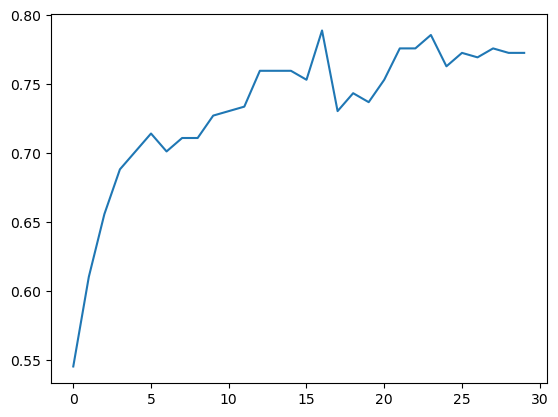

In [151]:
from matplotlib import pyplot as plt

plt.plot(accuracies[:])

In [152]:
X_test.shape

(308, 8)

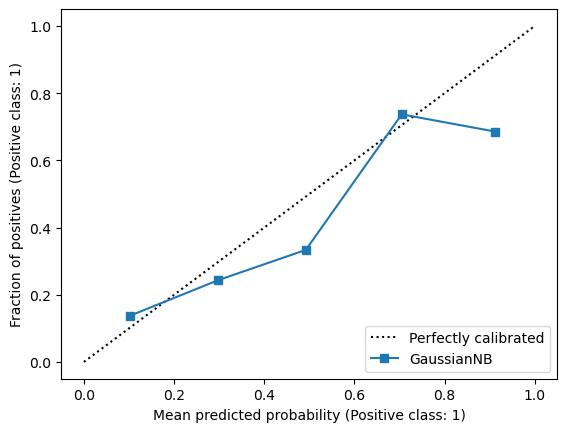

In [153]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.calibration import CalibrationDisplay

disp = CalibrationDisplay.from_estimator(classifier, X_test, y_test)
plt.show()

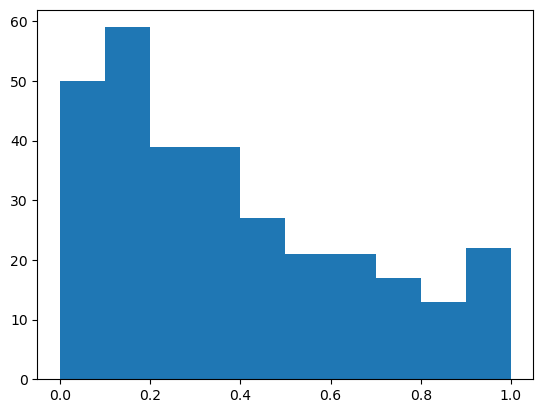

In [154]:
plt.hist(
	disp.y_prob,
	range=(0,1),
	bins=10,
	)
plt.show()